In [1]:
import pandas as pd
import numpy as np
import viterbi

# IMPORT RAW DATA

In [2]:
data = pd.read_csv('20220330_results_f0.csv')

In [3]:
data

,Unnamed: 0,timeframe,opensmile,praat_ac,praat_cc,praat_shs,swipe,rapt,yin,pyin,...,yaapt,hnr,cpp,creaky_prob,creaky_decision,oliver,intensity_dB,se,f0_derivative_oliver,file
0,0,0.000,269.553894,263.955116,257.390182,261.510175,NaN,255.597916,NaN,NaN,...,256.395349,-7.457227,20.510300,0.009938,0.0,264.173039,72.915582,12.073075,NaN,bfamcv02__289__RUT
1,1,0.005,269.553894,263.955116,257.390182,261.510175,NaN,256.165354,NaN,NaN,...,257.884562,-7.142928,20.510300,0.011636,0.0,264.173039,72.915582,12.073075,NaN,bfamcv02__289__RUT
2,2,0.010,269.553894,263.955116,257.390182,261.510175,NaN,257.890074,260.649399,NaN,...,259.373775,-6.825429,20.510300,0.013335,0.0,264.173039,72.915582,12.073075,NaN,bfamcv02__289__RUT
3,3,0.015,269.553894,263.955116,257.399573,261.510175,NaN,261.421168,263.652559,NaN,...,262.419118,-6.781200,20.510300,0.018280,0.0,264.173039,72.915582,12.073075,NaN,bfamcv02__289__RUT
4,4,0.020,269.553894,263.955116,260.160550,261.510175,NaN,262.268669,265.591315,NaN,...,265.505198,-7.057121,20.510300,0.023242,0.0,264.173039,72.915582,12.073075,NaN,bfamcv02__289__RUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422777,422777,3.550,72.278572,NaN,NaN,73.234383,NaN,NaN,69.868996,71.223578,...,NaN,13.843963,17.746239,0.109201,0.0,NaN,45.698771,1.123326,NaN,bpubdl01__224__ROG
422778,422778,3.555,72.278572,NaN,NaN,72.202465,NaN,NaN,NaN,71.182116,...,NaN,10.643914,17.746239,0.126052,0.0,NaN,45.698771,0.526467,NaN,bpubdl01__224__ROG
422779,422779,3.560,72.278572,NaN,NaN,71.800024,NaN,NaN,NaN,71.093783,...,NaN,8.145117,17.746239,0.142978,0.0,NaN,45.698771,0.526467,NaN,bpubdl01__224__ROG
422780,422780,3.565,72.278572,NaN,NaN,71.800024,NaN,NaN,NaN,71.005450,...,NaN,5.918232,17.746239,0.173119,0.0,NaN,45.698771,0.526467,NaN,bpubdl01__224__ROG


In [4]:
data.columns

Index(['Unnamed: 0', 'timeframe', 'opensmile', 'praat_ac', 'praat_cc',
       'praat_shs', 'swipe', 'rapt', 'yin', 'pyin', 'maps', 'bana', 'pefac',
       'srh', 'straight', 'swipep', 'yaapt', 'hnr', 'cpp', 'creaky_prob',
       'creaky_decision', 'oliver', 'intensity_dB', 'se',
       'f0_derivative_oliver', 'file'],
      dtype='object')

# Generate input data

Não! REVER

transition_prob: the greater the transition cost, the smaller the transition probability. Takes into account delta f0
https://en.wikipedia.org/wiki/Continuous-time_Markov_chain#Transition_probability_definition



emission_prob: the probability of changing from one algorithm to the other. 

initial_prob: the probability that each algorithm is more accurate than the other. Takes into account CPPS of whole files and hnr for each frame as calculated by PAPD.


In [5]:
observations_dict = {}

In [6]:
files = data['file'].unique()

In [7]:
# Select PDAs to be tested
pdas = ['bana', 'praat_ac', 'pefac', 'straight', 'swipep', 'yin']

In [8]:
observations_dict = {}
for file in files:
    data_subset = data[data.file == file]
    hnr = data_subset['hnr'].values
    creaky = data_subset['creaky_prob'].values
    cpp = data_subset['cpp'].values
    intens = data_subset['intensity_dB'].values
    data_subset = data_subset[pdas]
    obs_matrix = data_subset.values
    # We transpose the values so that each column contains the obs space of a frame
    observations_dict[file] = [obs_matrix.T, hnr, creaky, cpp, intens]

## Define a test_set


In [16]:
#test_set = observations_dict["bfamdl03__078__LAU"]
#test_set = observations_dict["bfamcv03__202__TON"]
#test_set = observations_dict["bfamcv01__002__GIL"]
test_set = observations_dict["bpubmn01__110__SHE"] # MUITO RUIDO DE FUNDO. CHECAR PERFORMANCE DO PRAAT AC
test_set = observations_dict["bfamcv03__202__TON"] # MUITO RUIDO DE FUNDO. CHECAR PERFORMANCE DO PRAAT AC

In [17]:
sd_min, state_idx_min = viterbi.max_agreement(test_set[0])

6
360


In [18]:
sd_min

0.5343682198301837

In [19]:
state_idx_min

128

## Calculate Transition Probabilities

In [20]:
# Calculate transition matrices
transition_matrices = viterbi.calculate_transition_matrices(test_set[0], voiced_unvoiced_proba=0.5)

In [21]:
len(transition_matrices)

359

In [22]:
transition_matrices[0]

array([[0.98691131, 0.5       , 0.10121593, 0.5       , 0.09826986,
        0.5       ],
       [0.5       , 1.        , 0.5       , 1.        , 0.5       ,
        1.        ],
       [0.10255828, 0.5       , 1.        , 0.5       , 0.97089325,
        0.5       ],
       [0.5       , 1.        , 0.5       , 1.        , 0.5       ,
        1.        ],
       [0.09921532, 0.5       , 0.96740432, 0.5       , 0.99640647,
        0.5       ],
       [0.5       , 1.        , 0.5       , 1.        , 0.5       ,
        1.        ]])

## Now we work on the emission matrices

pdas = ['bana', 'praat_ac', 'pefac', 'straight', 'swipep', 'yin']

delta f0 de la médiane ?

In [23]:
def calculate_emission_probabilities(data, hnr_vector, creaky_vector, voiced_unvoiced_proba=0.5):
    
    # TODO: Check if length of arrays are compatible
    # TODO: make more difficult to change pda

    emission_matrices = []
    for m in range(data.shape[1]):

        frame = data[:,m]
        hnr = hnr_vector[m]
        creaky = creaky_vector[m]

        if sum(np.isnan(frame)) > (frame.shape[0]/2):
            # Majority decision 
            median = np.nan
        else:
            median = np.nanmedian(frame)

        frame_prob = np.empty(shape=frame.shape)
        for i in range(frame.shape[0]):
            frame_prob[i] = viterbi.delta_candidate(median, frame[i], voiced_unvoiced_proba)

        # Bonus for 
        if hnr < 0:
            frame_prob[0] *= 1

        # Bonus for pefa
        if creaky == 1:
            frame_prob[0] *= 2.5
            frame_prob[2] *= 2.5
            frame_prob[4] *= 1.05
        
        emission_matrices.append(frame_prob)
    
    return emission_matrices

In [24]:
emission_matrices = calculate_emission_probabilities(test_set[0],
                                                     test_set[1],
                                                    test_set[2],
                                                    voiced_unvoiced_proba=0.5)

In [25]:
#emission_matrices = []
#for i in range(test_set.shape[1]):
#    em_m = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
#    emission_matrices.append(em_m)

## Calculate the viterbi path

In [26]:
winning_path, winning_candidates, _ = viterbi.viterbi_path(data=test_set[0],
                                                           transition_matrices=transition_matrices,
                                                           emission_matrices=emission_matrices,
                                                           reinforcement=1.1)

## VALIDATING RESULTS

### Plot

In [27]:
# http://seaborn.pydata.org/introduction.html
import matplotlib.pyplot as plt
import seaborn as sns


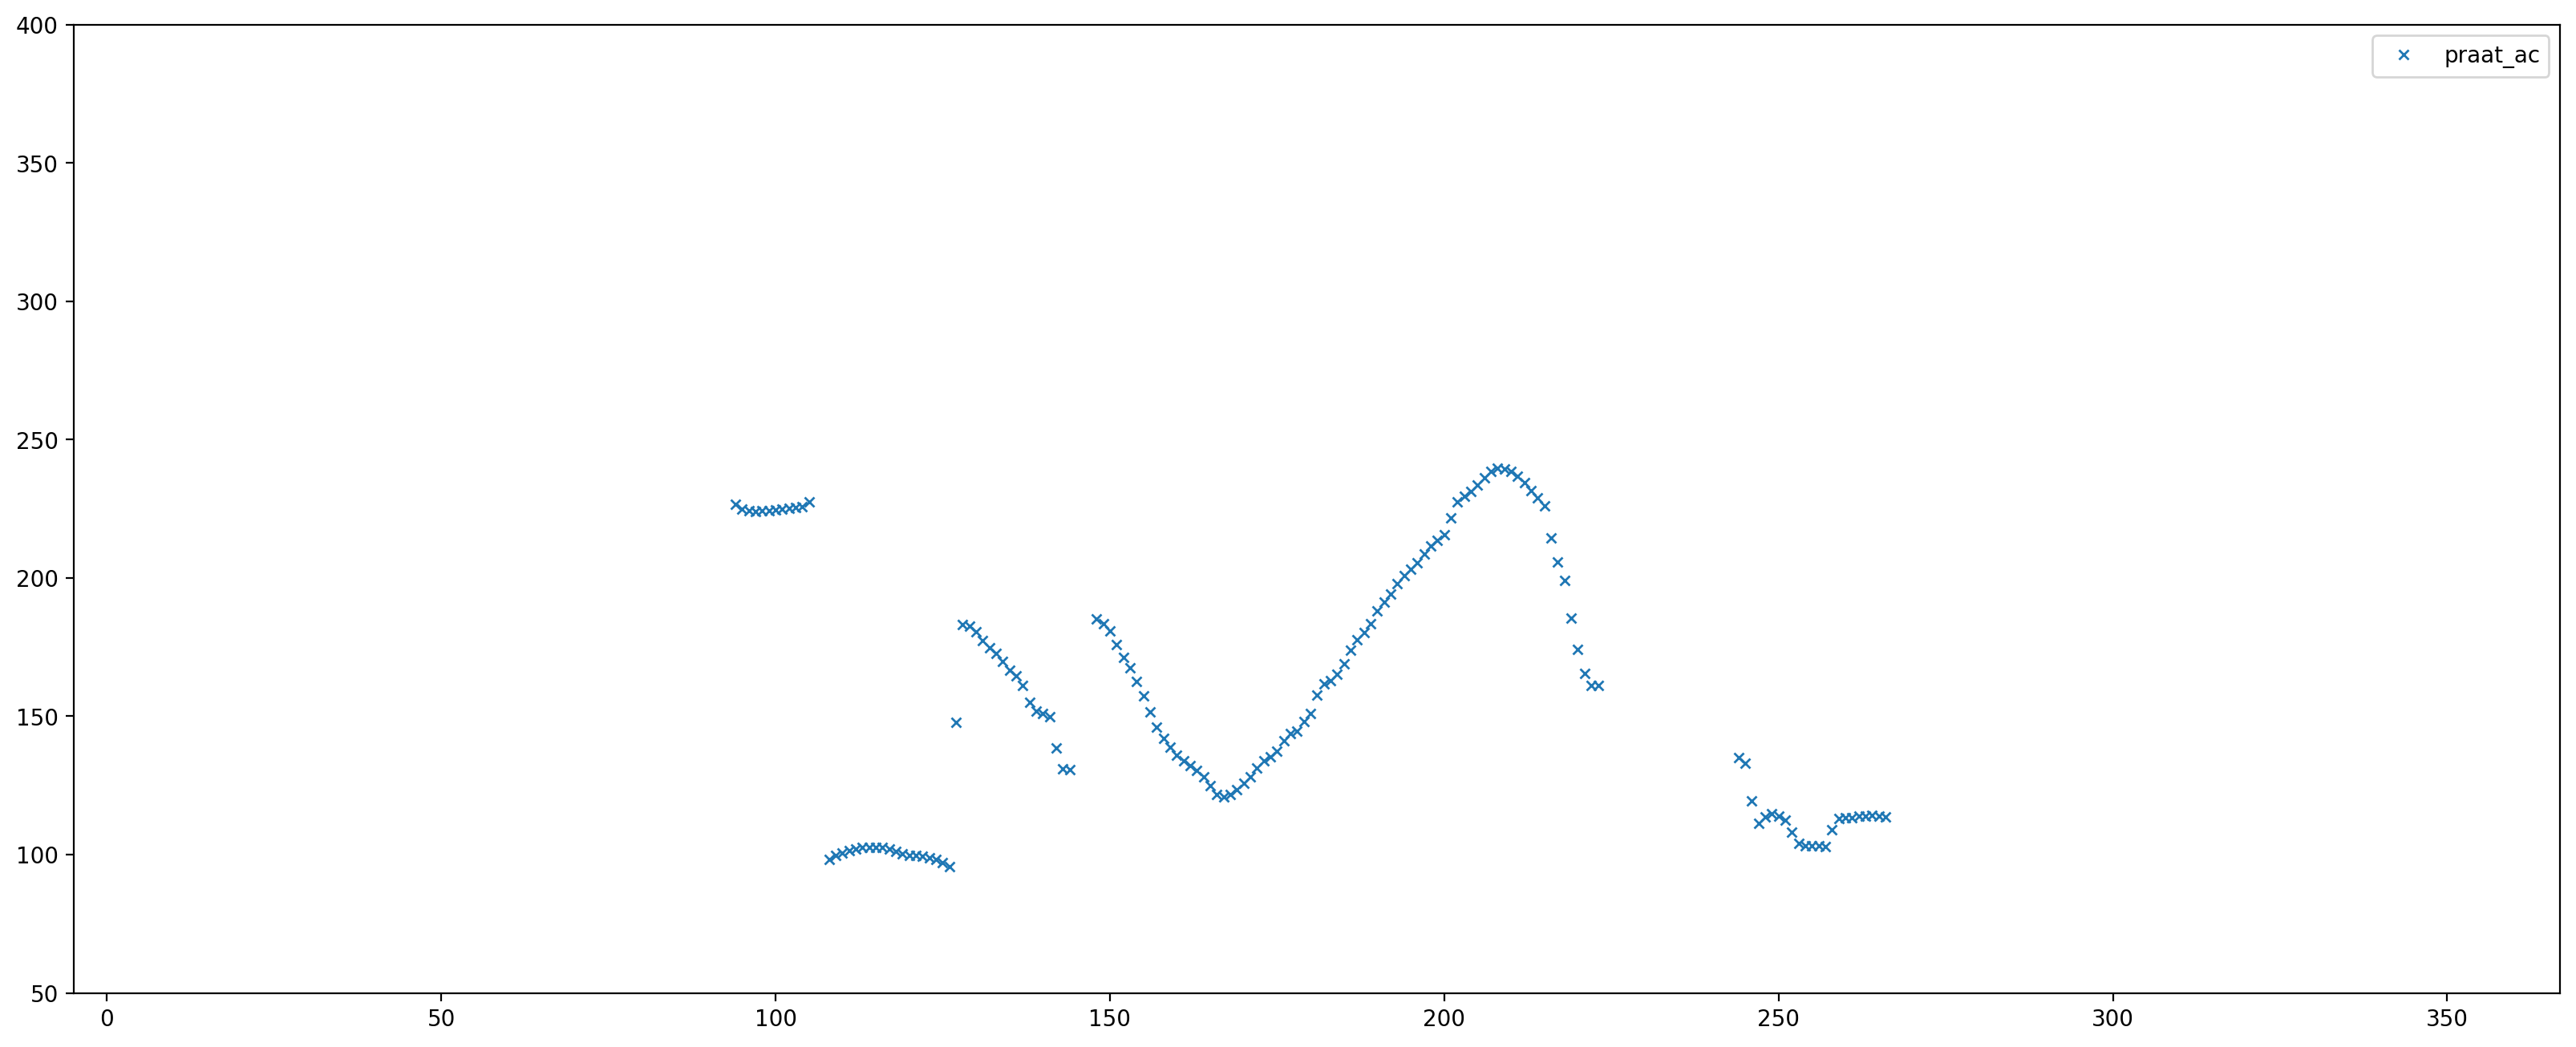

In [28]:
# Superposed algorithms

pdas = ['bana', 'praat_ac', 'pefac', 'straight', 'swipep', 'yin']

from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=200)
plt.ylim(50,400)
#plt.plot(test_set[0][0,:], '1', markersize=4, label='bana')
plt.plot(test_set[0][1,:], 'x', markersize=4, label='praat_ac')
#plt.plot(test_set[0][2,:], '+', markersize=4, label='pefac')
#plt.plot(test_set[0][3,:], '.', markersize=4, label='straight')
#plt.plot(test_set[0][4,:], 'd', markersize=4, label='swipep')
#plt.plot(test_set[0][5,:], '^', markersize=4, label='yin')
plt.legend(prop={'size': 10})

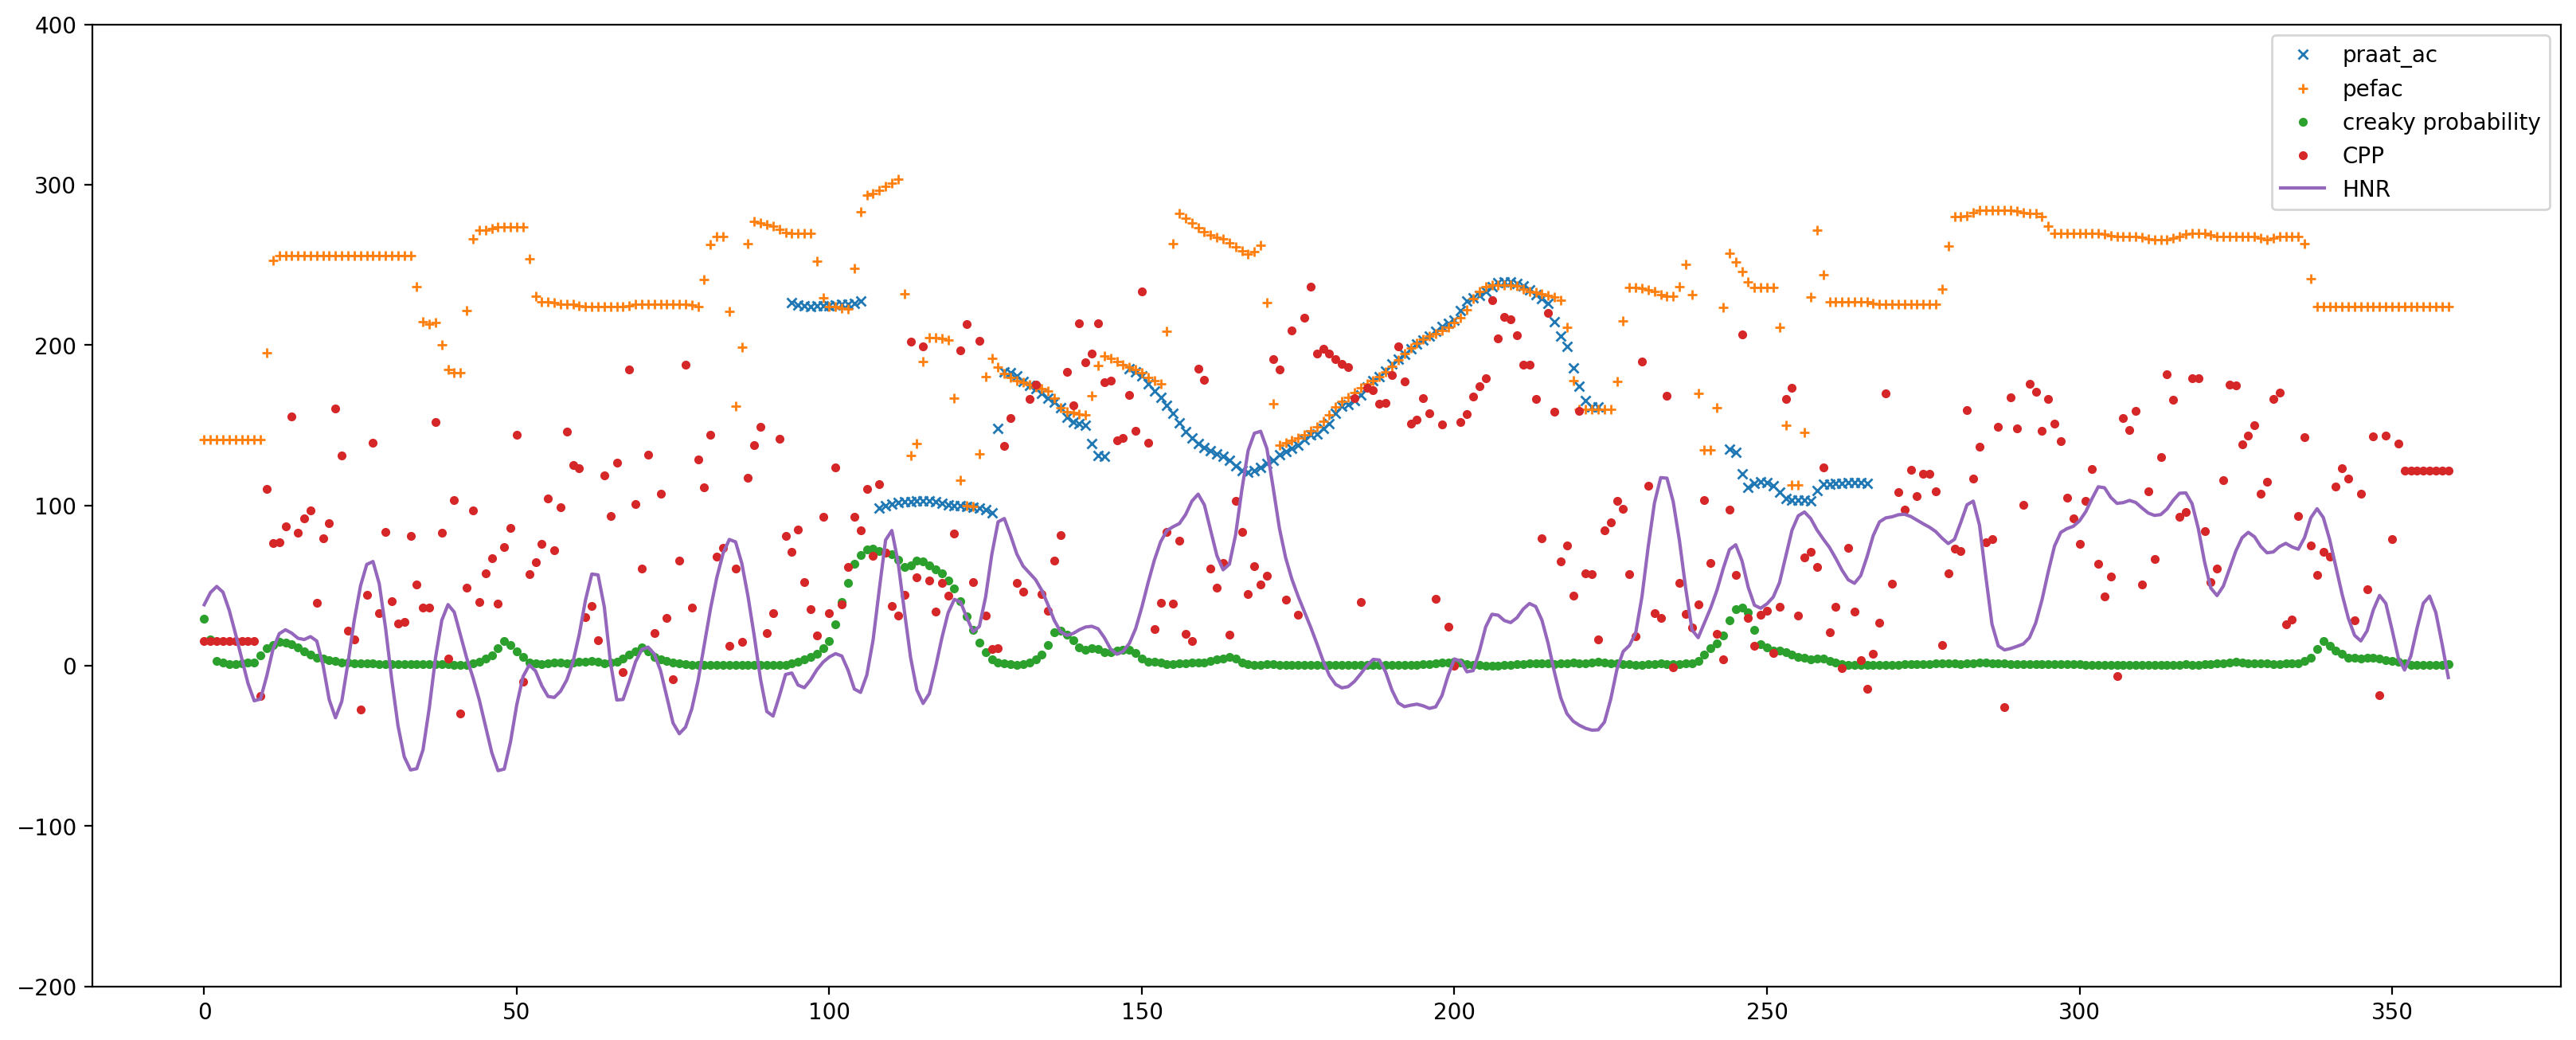

In [29]:
# Superposed algorithms
# observations_dict[file] = [obs_matrix.T, hnr, creaky, cpp, intens]
pdas = ['bana', 'praat_ac', 'pefac', 'straight', 'swipep', 'yin']

from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=200)
plt.ylim(-200,400)
#plt.plot(test_set[0][0,:], '1', markersize=4, label='bana')
plt.plot(test_set[0][1,:], 'x', markersize=4, label='praat_ac')
plt.plot(test_set[0][2,:], '+', markersize=4, label='pefac')
plt.plot(test_set[2]*100, '.', label='creaky probability')
plt.plot(test_set[3]*10, '.', label='CPP')
plt.plot(test_set[1]*10, '-', label='HNR')
#plt.plot(test_set[0][3,:], '.', markersize=4, label='straight')
#plt.plot(test_set[0][4,:], 'd', markersize=4, label='swipep')
#plt.plot(test_set[0][5,:], '^', markersize=4, label='yin')
plt.legend(prop={'size': 10})

The regions where there is more disagreement are the regions that Praat AC is devoicing. Let's check what HNR and CPP say about such regions.

Maybe try a correlation between standard deviation and those measures.

In [30]:
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'gray', 5:'orange'}
df = pd.DataFrame(dict(x=np.arange(len(winning_path)), y=winning_candidates, algo=winning_path))
df

,x,y,algo
0,0,140.779752,2
1,1,140.779752,2
2,2,140.779752,2
3,3,140.779752,2
4,4,140.779752,2
...,...,...,...
355,355,223.715952,2
356,356,223.715952,2
357,357,223.715952,2
358,358,223.715952,2


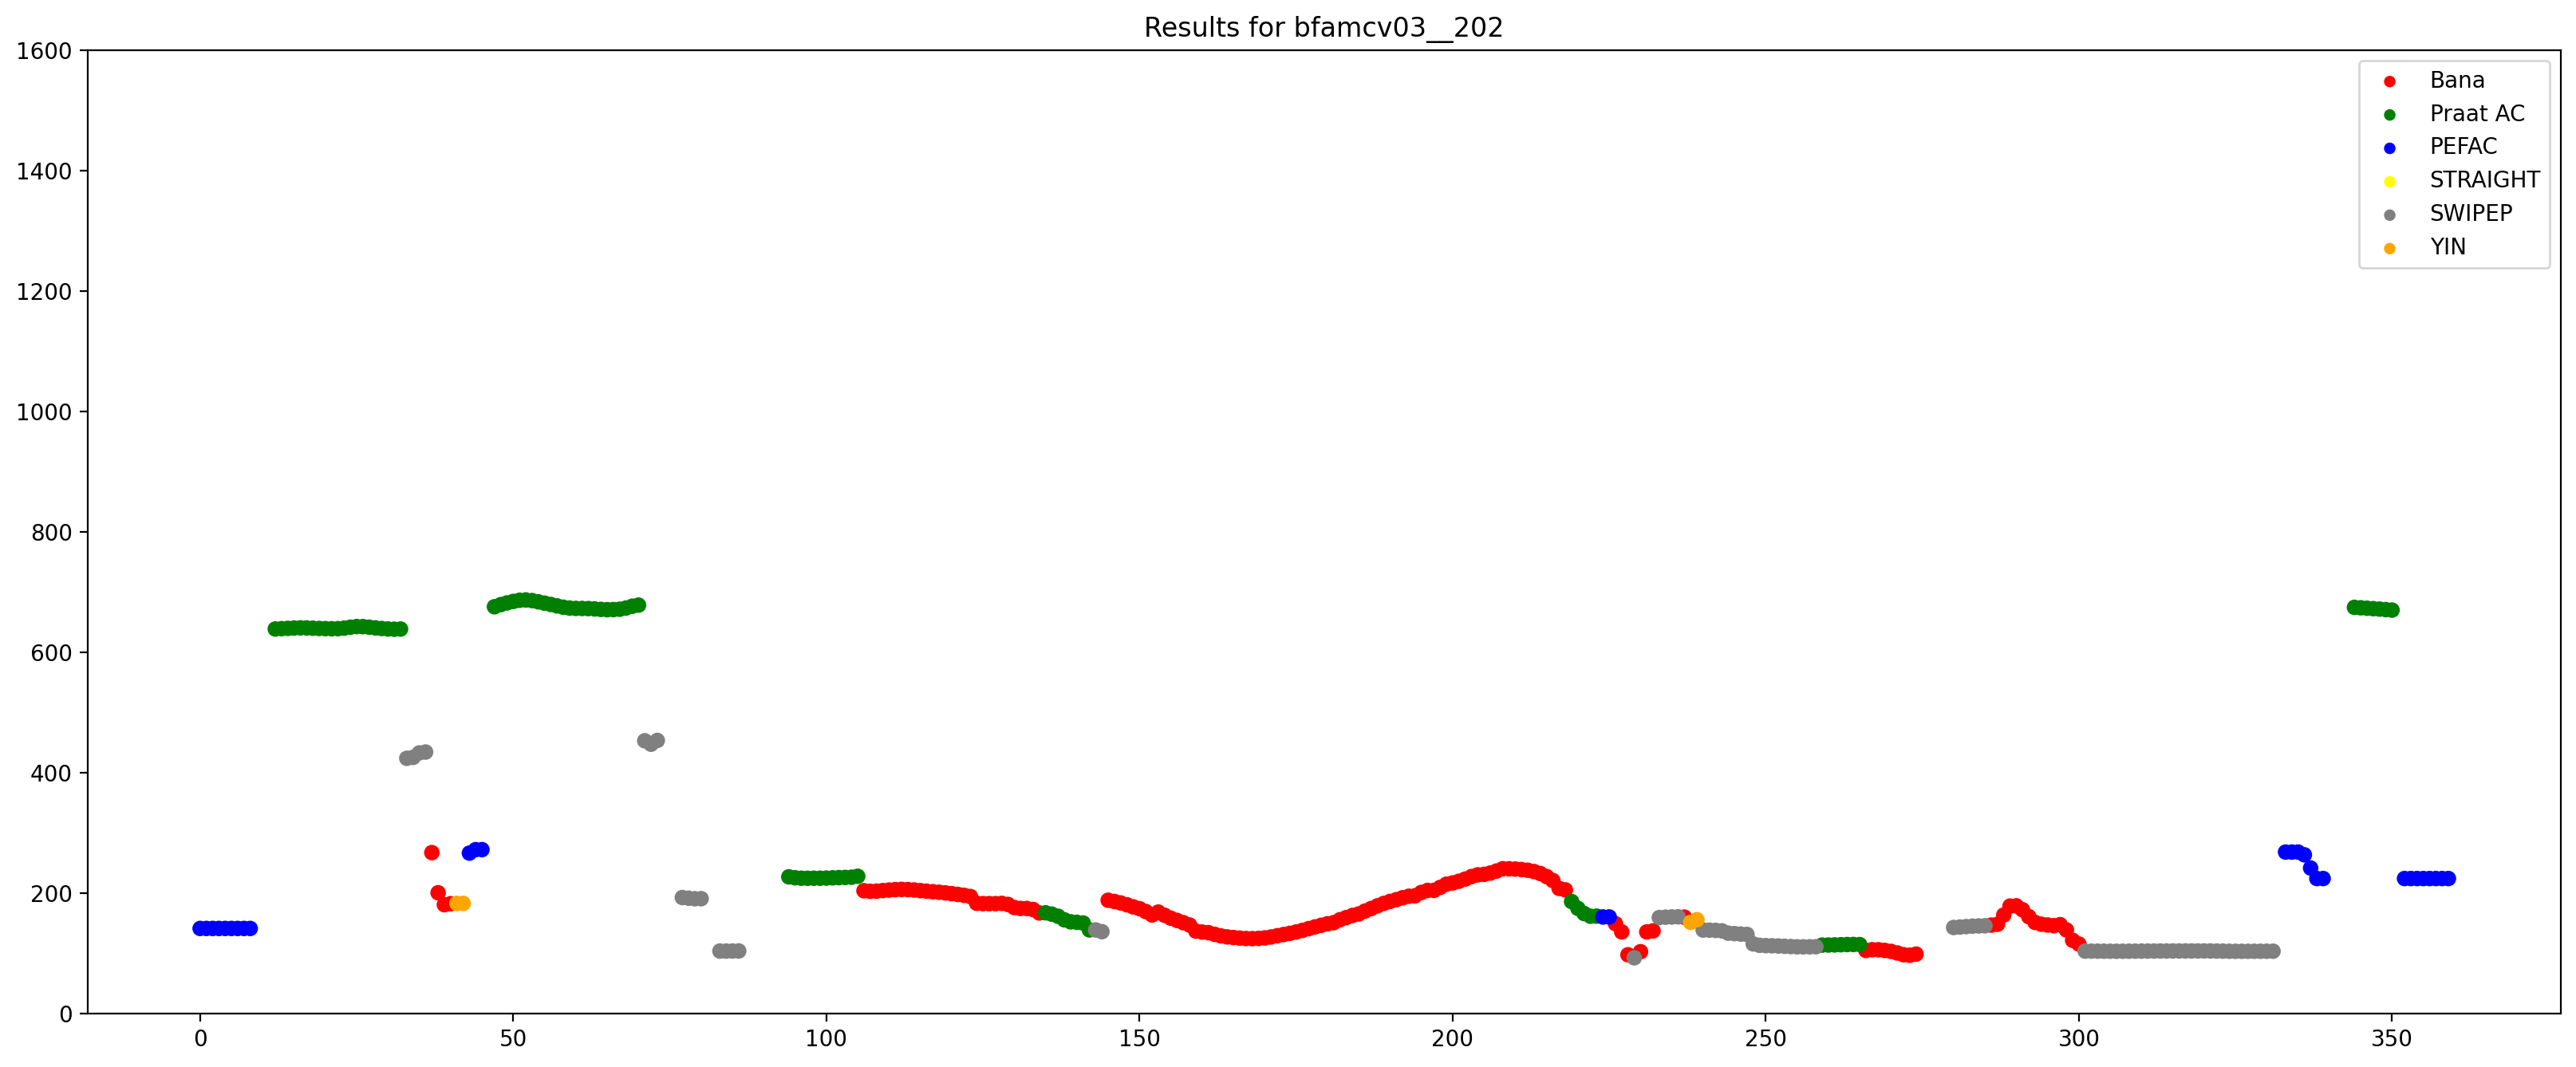

In [39]:
from matplotlib.pyplot import figure
figure(figsize=(20, 8), dpi=200)


colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'gray', 5:'orange'}
labels = {'red':'bana', 'green':'praat_ac', 'blue':'pefac', 'yellow':'straight', 'gray':'swipep', 'orange':'yin'}
markers = {0:'1', 1:'x', 2:'+', 3:'.', 4:'d', 5:'-'}

#for i in pd.Series(winning_path).map(colors):
#    print(i)

#ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))

#plt.scatter(df['x'], df['y'], c=df['algo'].map(colors), label='viterbi', marker=df['algo'].map(markers))

plt.ylim(0,1600)
plt.scatter(df.loc[df['algo']==0]['x'], df.loc[df['algo']==0]['y'], c=df.loc[df['algo']==0]['algo'].map(colors), label='Bana')
plt.scatter(df.loc[df['algo']==1]['x'], df.loc[df['algo']==1]['y'], c=df.loc[df['algo']==1]['algo'].map(colors), label='Praat AC')
plt.scatter(df.loc[df['algo']==2]['x'], df.loc[df['algo']==2]['y'], c=df.loc[df['algo']==2]['algo'].map(colors), label='PEFAC')
plt.scatter(df.loc[df['algo']==3]['x'], df.loc[df['algo']==3]['y'], c=df.loc[df['algo']==3]['algo'].map(colors), label='STRAIGHT')
plt.scatter(df.loc[df['algo']==4]['x'], df.loc[df['algo']==4]['y'], c=df.loc[df['algo']==4]['algo'].map(colors), label='SWIPEP')
plt.scatter(df.loc[df['algo']==5]['x'], df.loc[df['algo']==5]['y'], c=df.loc[df['algo']==5]['algo'].map(colors), label='YIN')

#plt.scatter(df['x'], df['y'], c=df['algo'].map(colors))

#plt.plot(test_set[0,:], '+', markersize=4, label='bana')
plt.title("Results for bfamcv03__202")
plt.legend(loc="upper right", markerscale=0.7, scatterpoints=1, fontsize=10)
#plt.legend(prop={'size': 15})

## We check what's happening where standard deviation is greater

With respect to:
- HNR
- CPP
- Creaky probability
- Intensity

## NOTAS

- bana e pefac parecem reconhecer melhor regiões onde tem mais intensidade

- Praat is good but not robust in all contexts. Search examples of that and show how the combination of algorithms can improve the results with a better voiced/unvoiced decision model.


## TODO

- Output information abou the proabability of some region, maybe a frame, having a reliable f0 value. One good candidate to measure this is how much different pdas are diverging in determined region and other measurments of HNR and CPP.
- Comparar o resultado do algo de viterbi com relação ao pitch revisado à mão
- A gente já tem o algoritmo de decisão vozeada / não-vozeada. Colocar na saída do algoritmo de Viterbi uma medida para dizer os frames onde parece existir lugares com maior problema onde há vozeamento! (ISSO É MUITO IMPORTANTE!!!) Como localizar as sobreposições de fala. Dizer que é ruim, mas não se preocupar com a razão.

# Algorithm

SSPBook (Weenink, 2018)

## Defs
Candidate: each pitch point outputted by a PDA at a given time t
State: each candidate's frequency and strength
Winning path: the final sequence of states that minimizes the cost function
Cumulative cost: the sum of the transition costs involved in a path
old state: f1
new state: f2


## Steps

Check if candidates are within a Fine Error Rate and decide which algorithm initial observation to get
- Within frame decision: what candidate should we get?
- plus de monde d'accord

What should be the strengths of each candidate in a given frame?
- indirectly related to the distance from the median value of all candidates in a frame?

The optimal path is the path with minimal global costs

The algorithm examines moving forward to a new state
- combine the cumulative costs of the all possible previous states with the local transition costs
- choose the transition which amounts in the smallest cumulative cost

After computing the combinations of local costs and accumulated costs, only the best transition survives and all other paths are discarded.

If we also store a pointer to the optimal previous state we can, after reaching the final state, make a trace back and so find the winning path, i.e. the path with the smallest accumulated cost.

Local transition_cost(f1, f2):
- 0 : if f1 = f2
- voiced / unvoiced cost : if f1 = 0 xor f2 = 0
- octave jump cost .* | 12 log2(f1/f2) | : if f1 != 0 and f2 != 0

# Predicting the winning path by means of a HMM 

https://en.wikipedia.org/wiki/Hidden_Markov_model
https://hmmlearn.readthedocs.io/en/latest/tutorial.html
https://stackoverflow.com/questions/9729968/python-implementation-of-viterbi-algorithm
https://pomegranate.readthedocs.io/en/latest/HiddenMarkovModel.html
http://scikit-learn.sourceforge.net/stable/modules/hmm.html
https://www.pythonpool.com/viterbi-algorithm-python/

https://fr.mathworks.com/help/audio/ug/pitch-tracking-using-multiple-pitch-estimations-and-hmm.html

hmm = HMM()
hmm.priors = np.array([0.5, 0.5]) # pi = prior probs
hmm.transition = np.array([[0.75, 0.25], # A = transition probs. / 2 states
                           [0.32, 0.68]])
hmm.emission = np.array([[0.8, 0.1, 0.1], # B = emission (observation) probs. / 3 obs modes
                         [0.1, 0.2, 0.7]])
 

In [20]:
!pip install hmmlearn

     |████████████████████████████████| 101 kB 6.3 MB/s ta 0:00:011
